In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# data visulization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading training data
train_data = pd.read_csv('train.csv')

In [4]:
train_data.head()

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,0,60,Self-emp-not-inc,235535,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,1,28,Self-emp-not-inc,123983,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,2,71,Self-emp-not-inc,130436,1st-4th,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,3,75,NaN,35724,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,4,50,Private,128143,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K


In [5]:
train_data.shape

(32724, 16)

### Cleaning the Data

In [7]:
train_data.isnull().sum()

ID                   0
age                  0
workclass         1895
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1901
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     568
net-income           0
dtype: int64

In [8]:
#dropping the NaN rows now 
train_data.dropna(how='any',inplace=True)

### Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. Some of the data provided are Categorical data like WorkClass, Education, Marital-Status, Occupation, Relationship, etc. we need to convert these into numerical notations.

**ONLY NET-INCOME IS OUR TARGET VARIABLE & REST OF ALL INDEPENDENT VARIABLE**

In [12]:
train_data.corr()

,ID,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
ID,1.000000,0.002474,0.002225,0.006263,-0.000304,-0.000557,-0.001072
age,0.002474,1.000000,-0.076765,0.044728,0.081501,0.051386,0.105833
fnlwgt,0.002225,-0.076765,1.000000,-0.044420,-0.001859,-0.000065,-0.020028
education-num,0.006263,0.044728,-0.044420,1.000000,0.130524,0.074870,0.149152
capital-gain,-0.000304,0.081501,-0.001859,0.130524,1.000000,-0.032082,0.083667
capital-loss,-0.000557,0.051386,-0.000065,0.074870,-0.032082,1.000000,0.052019
hours-per-week,-0.001072,0.105833,-0.020028,0.149152,0.083667,0.052019,1.000000


**THE CORRELATIONS DENOTES NOT MUCH RELATION WITH THIS COLUMNS W.R.T. TARGET VARIABLE**

In [15]:
# THATS WHY WE DROP THE COLUMNS
train_data.drop(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','native-country','hours-per-week'], axis=1, inplace=True)

In [16]:
train_data.head()

,ID,workclass,education,marital-status,occupation,relationship,race,gender,net-income
0,0,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
1,1,Self-emp-not-inc,Some-college,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,<=50K
2,2,Self-emp-not-inc,1st-4th,Divorced,Craft-repair,Not-in-family,White,Female,<=50K
4,4,Private,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,Male,>50K
5,5,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,>50K


#### Making TARGET VARIABLE categorical to numerical 

In [18]:
#mapping the data into numerical data using map function
train_data['net-income'] = train_data['net-income'].map({'<=50K': 0, '>50K': 1}).astype(int)

#### Using the map function, we can convert all the other categorical data in the dataset to numerical data.

#### GENDER

In [19]:
train_data['gender'] = train_data['gender'].map({'Male': 0, 'Female': 1}).astype(int)

#### RACE

In [20]:
train_data['race'] = train_data['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

#### MARITAL-STATUS

In [21]:
train_data['marital-status'] = train_data['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

#### WORKCLASS

In [22]:
train_data['workclass'] = train_data['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

#### EDUCATION

In [23]:
train_data['education'] = train_data['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

#### OCCUPATION

In [25]:
train_data['occupation'] = train_data['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4,'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

#### RELATIONSHIP

In [26]:
train_data['relationship'] = train_data['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [60]:
 train_data['gender'].value_counts()

0    20408
1     9874
Name: gender, dtype: int64

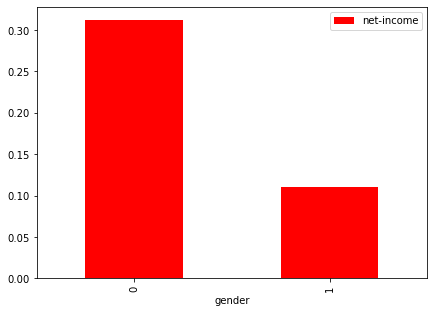

In [68]:
train_data.groupby(['gender'])['net-income'].mean().plot(kind='bar', color='red', figsize=(7,5))

The gender bar chart provides us some useful insight into the data that Men (0) are more likely to have a higher income

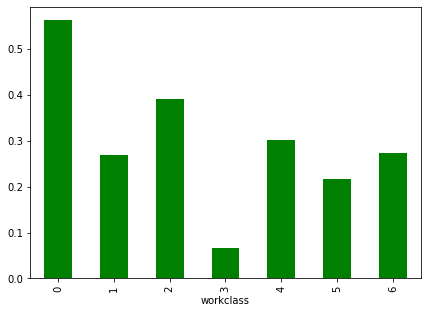

In [70]:
train_data.groupby(['workclass'])['net-income'].mean().plot(kind='bar', color='green', figsize=(7,5))

Self-emp-in (0), Federal-gov(2) workclass groups have a higher chance of earning more than 50K

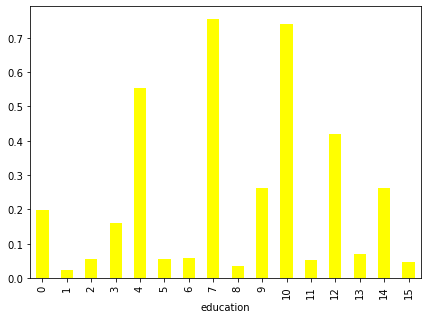

In [71]:
train_data.groupby(['education'])['net-income'].mean().plot(kind='bar', color='yellow', figsize=(7,5))

Adults with an educational background of Prof-school (7) and Doctorate (10) will have a better income and it is likely possible that their income is higher than 50K

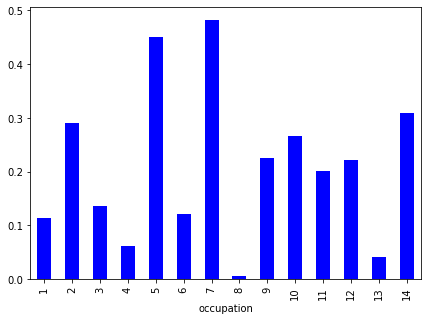

In [72]:
train_data.groupby(['occupation'])['net-income'].mean().plot(kind='bar', color='blue', figsize=(7,5))

Our data suggest that people with occupation Prof-specialty (5) and Exec-managerial (7) will have a better chance of earning an income of more than 50K

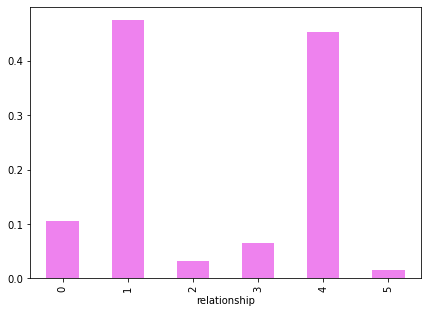

In [75]:
train_data.groupby(['relationship'])['net-income'].mean().plot(kind='bar', color='violet', figsize=(7,5))

Relationship chart shows us that wife (1) and husband (4) has a higher income. A married couple would most likely earn >50K

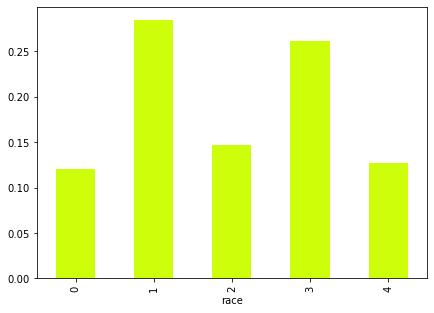

In [76]:
train_data.groupby(['race'])['net-income'].mean().plot(kind='bar', color='#CCFF09', figsize=(7,5))

As per the data, an Asian-Pac-Islander (1) or a white (3) have more chances of earning more than 50K

In [87]:
X_train = train_data.drop(['ID','net-income'], axis=1)
y_train = train_data.loc[:, 'net-income']

In [88]:
X_train

,workclass,education,marital-status,occupation,relationship,race,gender
0,6,3,2,7,4,3,0
1,6,0,2,10,5,1,0
2,6,8,4,9,0,3,1
4,5,12,2,9,4,3,0
5,5,0,2,10,4,3,0
...,...,...,...,...,...,...,...
32719,5,4,5,5,0,3,0
32720,5,3,2,6,4,3,0
32721,6,15,2,9,4,3,0
32722,5,0,4,3,3,3,1


In [89]:
y_train

0        0
1        0
2        0
4        1
5        1
        ..
32719    0
32720    0
32721    0
32722    0
32723    1
Name: net-income, Length: 30282, dtype: int32

In [90]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [91]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [92]:
X_train.head()

,workclass,education,marital-status,occupation,relationship,race,gender
0,6,3,2,7,4,3,0
1,6,0,2,10,5,1,0
2,6,8,4,9,0,3,1
4,5,12,2,9,4,3,0
5,5,0,2,10,4,3,0


In [94]:
#feeding the predict function with our test values in the format 
# [['relationship','education','race','occupation','gender','marital','workclass']]
classifier.predict([[1,7,3,7,0,2,0]])

array([0])

#### So it predict less than 50 net-income

# now reading the test data

In [293]:
test_df = pd.read_csv('test.csv')

In [294]:
test_df.head()

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,100002,67,Self-emp-inc,106175,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,75,United-States
1,100006,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,100016,51,Private,229225,Masters,14,Divorced,Other-service,Not-in-family,Black,Female,0,0,18,United-States
3,100026,28,Private,122037,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
4,100029,42,State-gov,82161,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,72,United-States


In [295]:
test_df.shape

(9000, 15)

In [296]:
test_df.isnull().sum()

ID                  0
age                 0
workclass         474
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        476
relationship        0
race                0
gender              0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    159
dtype: int64

#### Droping the NULL values 

In [297]:
test_df.dropna(how='any', inplace=True)

In [298]:
test_data = test_df.copy()

In [299]:
# THATS WHY WE DROP THE COLUMNS
test_data.drop(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','native-country','hours-per-week'], axis=1, inplace=True)

In [300]:
test_data.columns

Index(['ID', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender'],
      dtype='object')

In [301]:
test_data['gender'] = test_data['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [302]:
# gender

#race
test_data['race'] = test_data['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
#marital
test_data['marital-status'] = test_data['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
#workclass
test_data['workclass'] = test_data['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
#education
test_data['education'] = test_data['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
#occupation
test_data['occupation'] = test_data['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)
#relationship
test_data['relationship'] = test_data['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)


In [303]:
test_data.head()

,ID,workclass,education,marital-status,occupation,relationship,race,gender
0,100002,0,12,2,7,4,3,0
1,100006,6,3,2,7,4,3,0
2,100016,5,4,4,13,0,0,1
3,100026,5,12,2,5,4,3,0
4,100029,1,3,2,14,4,3,0


In [304]:
X_test = test_data.drop('ID', axis=1)
X_test.shape

(8376, 7)

In [305]:
X_test = np.array(X_test).reshape(8376, 7)

In [306]:
y_pred_test = classifier.predict(X_test)

In [307]:
y_pred_test
X_test = pd.DataFrame(X_test)
output_y_test = pd.DataFrame(y_pred_test, columns=['net-income'])

# OUTPUT

In [308]:
output_test_data = pd.concat([X_test, output_y_test], axis=1)

In [309]:
output_test_data.isnull().sum()

0             0
1             0
2             0
3             0
4             0
5             0
6             0
net-income    0
dtype: int64

In [310]:
output_test_data.rename(columns = {0:'workclass', 1:'education', 2:'marital-status', 3:'occupation', 4:'relationship',5:'race', 6:'gender'}, inplace=True)

In [311]:
output_test_data.iloc[:, -1].rename('net-income')

0       1
1       0
2       0
3       1
4       0
       ..
8371    1
8372    0
8373    0
8374    0
8375    1
Name: net-income, Length: 8376, dtype: int32

In [312]:
output_test_data

,workclass,education,marital-status,occupation,relationship,race,gender,net-income
0,0,12,2,7,4,3,0,1
1,6,3,2,7,4,3,0,0
2,5,4,4,13,0,0,1,0
3,5,12,2,5,4,3,0,1
4,1,3,2,14,4,3,0,0
...,...,...,...,...,...,...,...,...
8371,0,3,2,9,4,3,0,1
8372,5,5,5,3,5,3,1,0
8373,4,12,5,5,5,3,0,0
8374,5,3,2,7,1,4,1,0


In [313]:
# gender
output_test_data['gender'] = output_test_data['gender'].map({0:'Male',1:'Female'}).astype(str)
# #race
output_test_data['race'] = output_test_data['race'].map({0:'Black', 1:'Asian-Pac-Islander',2:'Other', 3:'White', 4:'Amer-Indian-Eskimo'}).astype(str)
# #marital
output_test_data['marital-status'] = output_test_data['marital-status'].map({0:'Married-spouse-absent', 1:'Widowed', 2:'Married-civ-spouse', 3:'Separated', 4:'Divorced',5:'Never-married', 6:'Married-AF-spouse'}).astype(str)
# #workclass
output_test_data['workclass'] = output_test_data['workclass'].map({0:'Self-emp-inc', 1:'State-gov',2:'Federal-gov', 3:'Without-pay', 4:'Local-gov',5:'Private', 6:'Self-emp-not-inc'}).astype(str)
# #education
output_test_data['education'] = output_test_data['education'].map({0:'Some-college', 1:'Preschool', 2:'5th-6th', 3:'HS-grad', 4:'Masters', 5:'12th', 6:'7th-8th', 7:'Prof-school',8:'1st-4th', 9:'Assoc-acdm', 10:'Doctorate', 11:'11th',12:'Bachelors', 13:'10th',14:'Assoc-voc',15:'9th'}).astype(str)
# #occupation
output_test_data['occupation'] = output_test_data['occupation'].map({ 1:'Farming-fishing', 2:'Tech-support', 3:'Adm-clerical', 4:'Handlers-cleaners', 5:'Prof-specialty',6:'Machine-op-inspct', 7:'Exec-managerial',8:'Priv-house-serv',9:'Craft-repair',10:'Sales', 11:'Transport-moving', 12:'Armed-Forces', 13:'Other-service',14:'Protective-serv'}).astype(str)
# #relationship
output_test_data['relationship'] = output_test_data['relationship'].map({0:'Not-in-family', 1:'Wife', 2:'Other-relative', 3:'Unmarried',4:'Husband',5:'Own-child'}).astype(str)

# net-income
output_test_data['net-income'] = output_test_data['net-income'].map({0:'<=50', 1:">50"}).astype(str)

In [314]:
output_test_data

,workclass,education,marital-status,occupation,relationship,race,gender,net-income
0,Self-emp-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,>50
1,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50
2,Private,Masters,Divorced,Other-service,Not-in-family,Black,Female,<=50
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,>50
4,State-gov,HS-grad,Married-civ-spouse,Protective-serv,Husband,White,Male,<=50
...,...,...,...,...,...,...,...,...
8371,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,>50
8372,Private,12th,Never-married,Adm-clerical,Own-child,White,Female,<=50
8373,Local-gov,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,<=50
8374,Private,HS-grad,Married-civ-spouse,Exec-managerial,Wife,Amer-Indian-Eskimo,Female,<=50


In [326]:
output_test_data.to_csv('sample_output.csv',index=True)

### HACKATHON: DECODE - 10.3 COMPLETE